# Sesión 1

In [56]:
import numpy as np 
from numpy.linalg import inv
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sb

# Regresión Lineal Simple


In [57]:
cols_headers = "Estatura Peso Pie Brazo Espalda Craneo Rodilla".split()
df = pd.read_csv('../datos/Datos1F.txt', names=cols_headers)
df.tail()

,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
22,155.0,53.0,36.0,67.0,43.0,56.0,38.0
23,189.0,87.0,45.0,82.0,53.0,61.0,52.0
24,170.0,70.0,38.0,73.0,45.0,56.0,43.0
25,170.0,67.0,40.0,77.0,46.5,58.0,44.0
26,168.0,56.0,37.5,70.5,48.0,60.0,40.0


In [58]:
df.describe()

,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,168.777778,63.888889,38.981481,73.462963,45.851852,57.240741,43.074074
std,10.195524,12.801242,2.863838,4.957368,4.021134,1.841667,3.149187
min,152.000000,43.000000,34.000000,66.000000,36.000000,54.000000,38.000000
25%,160.000000,52.000000,36.000000,69.500000,43.500000,56.000000,41.000000
50%,168.000000,65.000000,39.000000,73.000000,46.000000,57.000000,43.000000
75%,177.000000,73.500000,41.000000,76.500000,48.000000,58.500000,44.500000
max,189.000000,91.000000,45.000000,83.000000,53.000000,61.000000,52.000000


In [59]:
lm = smf.ols('Estatura~Peso', df)
lm_fit = lm.fit()

In [60]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Estatura   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     55.46
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           8.45e-08
Time:                        10:57:41   Log-Likelihood:                -84.714
No. Observations:                  27   AIC:                             173.4
Df Residuals:                      25   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.5317      5.781     21.887      0.0

#### Conclusión
Con los datos que acabó de arrojar statsmodels se concluye que la recta de regresión es:

$$
Y = 126.5317 + 0.6612X
$$
donde $Y$ es la estatura y $X$ el peso

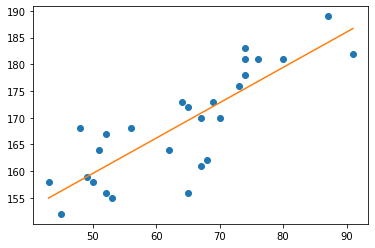

In [61]:
xx= np.linspace(df['Peso'].min(), df['Peso'].max())
yy = 126.5317 + 0.6612*xx
fig = plt.plot(df['Peso'], df['Estatura'],'o',xx,yy)

Otra forma de calcular los betas es usando matrices

In [62]:
Y = df['Estatura']
df['Ones'] = 1
X=df[['Ones','Peso']]
betas = inv(X.T @ X) @ (X.T @ Y)
betas

array([126.53173734,   0.66124237])

Los coeficientes encontrados son iguales que los hallados por el modelo de statsmodels

## Cálculo de los errores de estimación de los $\beta$

$$
V(\hat{\beta}_0) = C_{00}\sigma^2
$$
$$
V(\hat{\beta}_1) = C_{11}\sigma^2
$$
donde $C_{ii}$ es el elemento de la fila $i$ y columna $i$ de la matriz $(X^TX)^{-1}$

Para estimar $\sigma^2$ se usa una función de los datos muestrales. En este caso:

$$
\sigma^2=\frac{SEE}{(n-2)}
$$
donde 
$$
SSE = Y^TY-\beta^TX^TY
$$

In [63]:
SSE = Y.T @ Y - betas.T @ X.T @ Y
n=len(Y)
S2=SSE/(n-2)
S2

33.58905961501412

In [64]:
# Errores en la estimación de los coeficientes betas
P = inv(X.T @ X)

C_00 = P[0,0]
C_11 = P[1,1]

var_b0 = C_00 * S2
var_b1 = C_11 * S2

# El error es la raiz cuadrada de la varianza del estimador
err0 = np.sqrt(var_b0)
err1 = np.sqrt(var_b1)

err0

5.781256064849965

In [65]:
err1

0.08878920007608997

Por statsmodels se obtuvieron los mismos resultados!

## Intervalos de confianza

$$
\left[\hat{\beta}_i - t_{\alpha/2} S\sqrt{C_{ii}} , \quad \hat{\beta}_i + t_{\alpha/2} S\sqrt{C_{ii}}\right]
$$

In [66]:
alpha = 1 - 0.95
lower_bound_b0 = betas[0] - t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b0)
upper_bound_b0 = betas[0] + t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b0)
lower_bound_b0, upper_bound_b0

(114.6250175900689, 138.4384570878635)

In [67]:
lower_bound_b1 = betas[1] - t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b1)
upper_bound_b1 = betas[1] + t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(var_b1)
lower_bound_b1, upper_bound_b1

(0.47837759146091907, 0.8441071527105851)

Los intervalos de confianza son iguales que los obtenidos por statsmodels.

Ahora vamos a calcular el valor $P$ de la prueba de hipótesis

$$
H_0 : \beta_i = 0
$$
$$
H_a : \beta_i \neq 0
$$

Necesitamos un test para rechazar la hipótesis nula

$$
T = \frac{\hat{\beta}_i - \beta_{i0}}{S\sqrt{C_{ii}}}
$$
$$
\beta_{i0} = 0
$$

In [68]:
T_0 = betas[0]/(np.sqrt(var_b0))
T_1 = betas[1]/(np.sqrt(var_b1))
T_0, T_1

(21.886547822761063, 7.447328858904969)

In [69]:
t.ppf(0.975, df = len(Y)-len(betas))

2.059538552753294

Con $\alpha = 5\% $ se rechaza $H_0$.

Calculemos el nivel de significancia alcanzado, es decir, el p-value, que equivale a encontrar el área bajo la curva de la distribución de probabilidad suponiendo que la hipótesis nula $H_0$ es verdadera.

El valor del estádistico de prueba calculado con los datos observados fue de $T_0 = 21.8865$ y $T_1=7.4473$

In [70]:
p_value_0 = t.cdf(-T_0, df=len(Y) - len(betas))
p_value_1 = t.cdf(-T_1, df=len(Y) - len(betas))
p_value_0, p_value_1

(3.994404174819729e-18, 4.223976154920601e-08)

Para estos valores, siempre se rechaza $H_0$

## Predicción para un valor particular de $Y$

Hasta el momento, el modelo entrega es el valor promedio. Calculemos el intervalo de confiazna para una observación en particular

$$
a^T \hat{\beta} \pm t_{\alpha/2} S \sqrt{1 + a^T(X^TX)^{-1}a}
$$

Caso $a = [1 \quad 70]$

In [71]:
a = np.array([1, 70])
interval = t.ppf(0.975, df = len(Y) - len(betas)) * np.sqrt(S2) * np.sqrt(1 + a.T @ inv(X.T @ X) @ a)
y_predict_min = a @ betas - interval
y_predict_max = a @ betas + interval
# Valor esperado, error, intervalo de confianza
a @ betas, interval, y_predict_min, y_predict_max

(172.81870338496884, 12.20656971599652, 160.61213366897232, 185.02527310096536)

El valor de predicción de Y no lo arroja StatsModels

## Análisis de dependencias entre variables explicativas

In [72]:
df.drop('Ones', axis = 1, inplace = True)
df.head(7)

,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
0,159.0,49.0,36.0,68.0,42.0,57.0,40.0
1,164.0,62.0,39.0,73.0,44.0,55.0,44.0
2,172.0,65.0,38.0,75.0,48.0,58.0,44.0
3,167.0,52.0,37.0,73.0,41.5,58.0,44.0
4,164.0,51.0,36.0,71.0,44.5,54.0,40.0
5,161.0,67.0,38.0,71.0,44.0,56.0,42.0
6,168.0,48.0,39.0,72.5,41.0,54.5,43.0


### 1. Correlación entre pares de variables

Correlación entre cada par de variables

#### Matriz de correlación de Pearson

<AxesSubplot:>

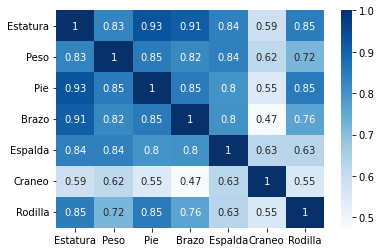

In [73]:
sb.heatmap(df.corr(), cmap='Blues', annot=True)

#### Matriz de correlación de Kendall

<AxesSubplot:>

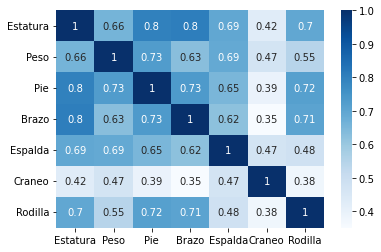

In [74]:
sb.heatmap(df.corr('kendall'), cmap='Blues', annot=True)

#### Matriz de correlación de Spearman

<AxesSubplot:>

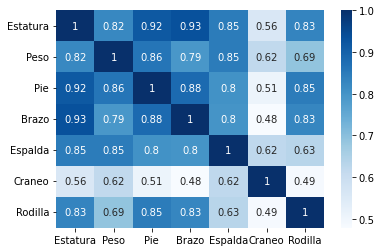

In [75]:
sb.heatmap(df.corr('spearman'), cmap='Blues', annot=True)

Se observa que la menor correlación es entre la longitud del brazo y el diámetro del cráneo

### 2. Correlación lineal múltiple

Análisis de dependencia de una variable con el resto de variables. Si una variable es una combinación lineal de las demás, se puede predecir sin error con el resto de variables. Es decir, se puede eliminar la variable de consideración.

$$
R^2 = 1 - \frac{1}{S^{jj}S_{jj}}
$$
donde $S^{jj}$ es el elemento $j$ de la matriz de varianza y covarianzas

donde $S_{jj}$ es el elemento $j$ de la matriz de varianza y covarianzas inversa

Esta expresión permite calcular los coeficientes de correlación múltiples a partir de las matrices $S$ y $S^{-1}$

In [76]:
S = df.cov()
S


,Estatura,Peso,Pie,Brazo,Espalda,Craneo,Rodilla
Estatura,103.948718,108.358974,27.091880,45.856838,34.427350,11.036325,27.132479
Peso,108.358974,163.871795,31.151709,52.053419,43.213675,14.604701,28.970085
Pie,27.091880,31.151709,8.201567,12.095442,9.189459,2.889245,7.674501
Brazo,45.856838,52.053419,12.095442,24.575499,15.975071,4.336182,11.906695
Espalda,34.427350,43.213675,9.189459,15.975071,16.169516,4.642806,7.992165
Craneo,11.036325,14.604701,2.889245,4.336182,4.642806,3.391738,3.212251
Rodilla,27.132479,28.970085,7.674501,11.906695,7.992165,3.212251,9.917379


In [77]:
S_inv = inv(S)
S_inv.round(2)

array([[ 0.14,  0.01, -0.2 , -0.1 , -0.07, -0.05, -0.07],
       [ 0.01,  0.03, -0.07, -0.03, -0.04, -0.04, -0.  ],
       [-0.2 , -0.07,  1.21,  0.06, -0.04,  0.17, -0.27],
       [-0.1 , -0.03,  0.06,  0.28, -0.04,  0.13, -0.03],
       [-0.07, -0.04, -0.04, -0.04,  0.33, -0.13,  0.15],
       [-0.05, -0.04,  0.17,  0.13, -0.13,  0.61, -0.14],
       [-0.07, -0.  , -0.27, -0.03,  0.15, -0.14,  0.48]])

Por ejemplo:

In [78]:
R2 = 1 - 1/(np.diag(S)*np.diag(S_inv))
print(cols_headers)
R2.round(2)

['Estatura', 'Peso', 'Pie', 'Brazo', 'Espalda', 'Craneo', 'Rodilla']


array([0.93, 0.82, 0.9 , 0.85, 0.81, 0.52, 0.79])

Se puede ver que la variable más previsible por las restantes es la estatura ($R^2 = 0.93$) y la menos previsible es el diámetro del cráneo ($R^2 = 0.52$)

# QUIZ

Hacer la regresión de la estatura contra todas las otras variables y encontrar el coeficiente de determinación

In [79]:
lm = smf.ols('Estatura~Peso+Pie+Brazo+Espalda+Craneo+Rodilla', df)
lm_fit = lm.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Estatura   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     45.05
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.40e-10
Time:                        10:57:45   Log-Likelihood:                -64.379
No. Observations:                  27   AIC:                             142.8
Df Residuals:                      20   BIC:                             151.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9831     26.023      0.038      0.9

In [80]:
X = df.drop('Estatura', axis=1)
X['Intercepto'] = 1
y = df['Estatura']
lm = sm.OLS(y, X,)
lm_fit = lm.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Estatura   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     45.05
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.40e-10
Time:                        10:57:45   Log-Likelihood:                -64.379
No. Observations:                  27   AIC:                             142.8
Df Residuals:                      20   BIC:                             151.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Peso          -0.0944      0.108     -0.874      0.3